In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

2024-04-13 22:20:25.270658: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-13 22:20:25.273631: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-13 22:20:25.314269: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-13 22:20:26.180532: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
# load model
model = tf.keras.models.load_model('./models/object_detection.keras')
print('model loaded sucessfully')

model loaded sucessfully


In [4]:
path = './images/N207.jpeg'
image = load_img(path) # PIL object
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output

In [5]:
# size of the orginal image
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)

Height of the image = 423
Width of the image = 541


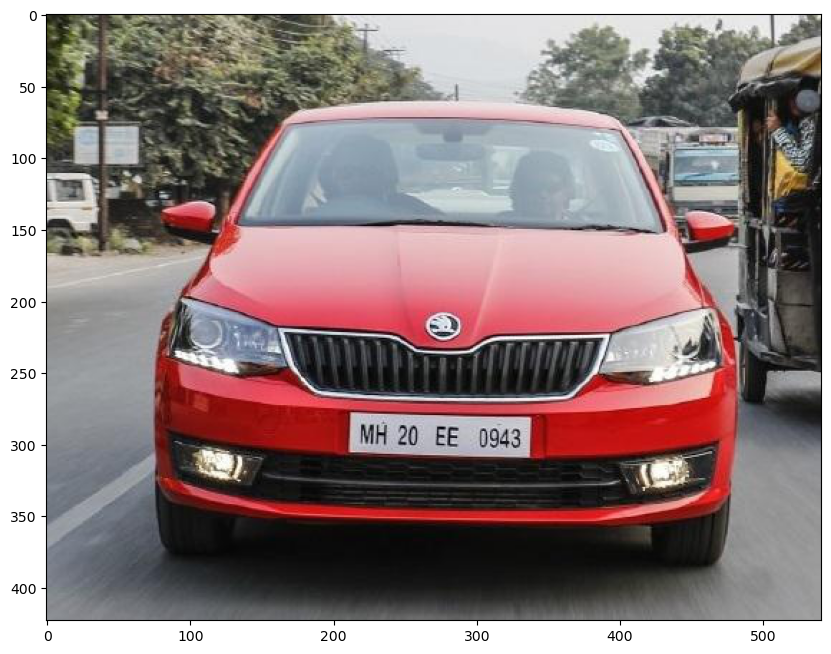

In [6]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [7]:
image_arr_224.shape

(224, 224, 3)

In [8]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [9]:
# make predictions
coords = model.predict(test_arr)
coords

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


array([[0.28926465, 0.535222  , 0.69455814, 0.7943732 ]], dtype=float32)

In [10]:
# denormalize the values
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[156.49217519, 289.55509871, 293.79809475, 336.01986963]])

In [11]:
coords = coords.astype(np.int32)
coords

array([[156, 289, 293, 336]], dtype=int32)

(156, 293) (289, 336)


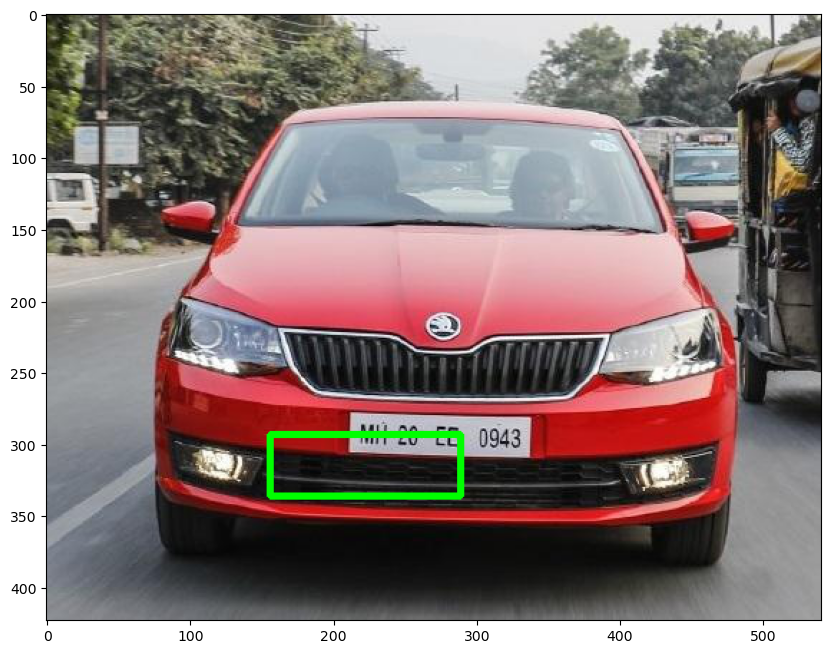

In [12]:
# draw bounding on top the image
xmin, xmax,ymin,ymax = coords[0]
pt1 =(xmin,ymin)
pt2 =(xmax,ymax)
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [13]:
# create pipeline
def object_detection(path):
    # read image
    image = load_img(path) # PIL object
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    # data preprocessing
    image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    # make predictions
    coords = model.predict(test_arr)
    # denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    # draw bounding on top the image
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
(422, 542) (600, 584)


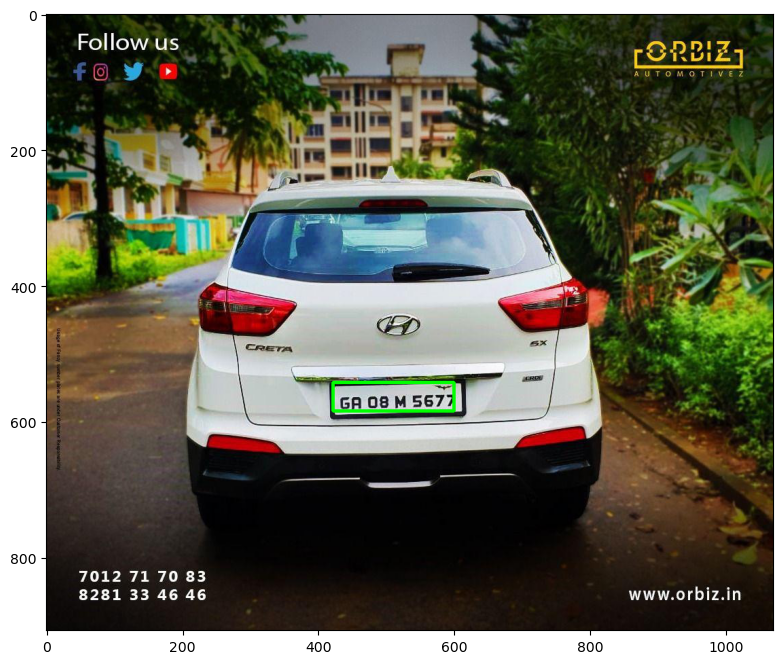

In [14]:
path = './images/N147.jpeg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('labels.csv')
import xml.etree.ElementTree as xet
import os

def getFilename(filename):
    filename_image = xet.parse(filename).getroot().find('filename').text
    filepath_image = os.path.join('./images',filename_image)
    return filepath_image

image_paths = list(df['filepath'].apply(getFilename))

for ind in range(len(image_paths)):
    image_path = image_paths[ind]
    image, cods = object_detection(image_path)
    plt.imshow(image)
    plt.savefig(image_path.replace("./images", "./output"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
(311, 260) (472, 291)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
(195, 133) (346, 172)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
(768, 972) (1125, 1106)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
(98, 240) (261, 279)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
(312, 324) (565, 396)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
(232, 285) (724, 398)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
(456, 717) (651, 773)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
(1189, 822) (1712, 951)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
(106, 68) (227, 99)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
(154, 194) (247, 216)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
(321, 206) (574, 252)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
(212, 152) (340, 185)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
(803, 627) (1167, 741)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
(157, 116) (347, 172)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
(145, 130) (367, 180)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
(269, 239) (350, 285)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


# Optical Character Recognition - OCR

In [15]:
import pytesseract as pt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
(156, 293) (289, 336)


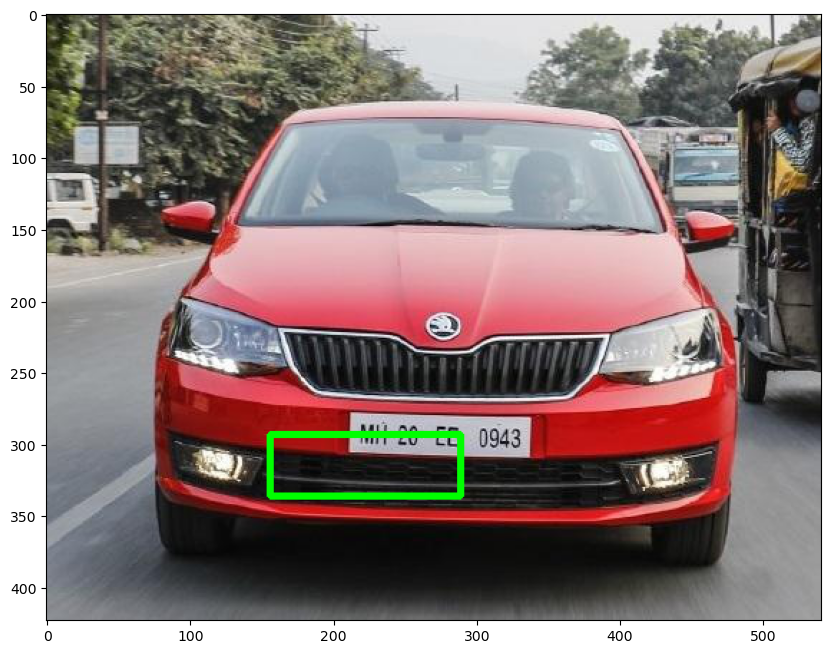

In [16]:
path = './images/N207.jpeg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [17]:
img = np.array(load_img(path))
xmin ,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

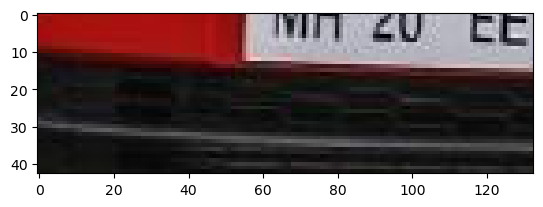

In [18]:
plt.imshow(roi)
plt.show()

In [19]:
# extract text from image
text = pt.image_to_string(roi)
print(text)

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.